## Calculating the return on investment in S&P 500 stocks.
Hypothesis: The returns on investment taking into account, the uncertainity in market returns will be higher than the traditional calculation of returns

Completed:
Initial program draft .
Pending: 
Doc tests, doc strings and writing classes where appropriate

In [90]:
# 1.Import needed libraries, set plots to display in notebook

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots


In [91]:
# 2. Regular savings calculator approach for 30 year period.
# The average  expected return for the stock is  14.4% 


In [92]:
p = 10000
time_period = 30
i =.07
annual_add = 10000

for year in range(time_period):
    ending = p * (1+i) + annual_add
    print((ending))
    p = ending

20700.0
32149.0
44399.43
57507.390100000004
71532.907407
86540.21092549001
102598.02569027431
119779.88748859352
138164.47961279508
157835.99318569075
178884.51270868912
201406.42859829735
225504.87860017817
251290.22010219065
278880.535509344
308402.1729949981
339990.325104648
373789.6478619734
409954.9232123115
448651.76783717336
490057.39158577553
534361.4089967798
581766.7076265544
632490.3771604133
686764.7035616423
744838.2328109574
806976.9091077244
873465.2927452652
944607.8632374338
1020730.4136640542


In [93]:
#Average volatility is 0.7

In [94]:
p = 10000
expected_return = .07
volatility = .14
time_period = 30
annual_add = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_period):
    market_return = np.random.normal(expected_return, volatility)
    fv = p * (1 + market_return) + annual_add
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(fv))
    p = fv





	Return     		Ending Value
	-0.1187               	18813.091349329512
	0.0519               	29788.987773890727
	0.106               	42946.2816412484
	0.1785               	60612.599979097504
	-0.3031               	52239.74059784444
	0.1194               	68478.53815994189
	0.0093               	79117.65473488021
	0.0465               	92795.1082951842
	0.313               	131836.3771065693
	-0.0231               	138787.8465406991
	0.1382               	167966.66533495375
	0.2059               	212553.24160819247
	0.0494               	233048.1612999627
	0.1838               	285887.38045131654
	0.3601               	398838.798998978
	0.166               	475050.42099738395
	0.0288               	498715.1687824891
	0.155               	586006.8026739625
	0.0099               	601807.4687458008
	0.0451               	638968.6454889119
	-0.0366               	625571.1266039987
	0.0547               	669819.3212845222
	0.1077               	751936.2123212317
	-0.1259               	66

In [95]:
# 4. Simulate portfolio ending market values 

sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .07
    volatility = .14
    time_period = 30
    p = 10000
    annual_add = 10000
    stream = []
    for i in range(time_period):
        end = round(p * (1 + np.random.normal(expected_return,volatility)) + annual_add,2)
        
        stream.append(end)

        p= end

    
    sim[x] = stream

In [96]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,20050.55,23113.62,21720.06,19873.98,21496.91
1,31560.43,33180.96,29717.34,25624.14,30514.17
2,39478.35,53901.23,37409.43,39444.53,51364.05
3,54809.93,59549.14,52168.86,58050.45,66649.53
4,76569.33,65443.32,59125.19,78671.85,79639.82
5,76086.22,70216.60,75186.67,94122.77,84040.57
6,88958.20,79647.91,91584.95,93330.45,91354.80
7,112833.32,96995.88,103266.28,125889.63,95259.05
8,150100.99,129381.96,96661.20,120297.64,91479.81
9,181923.63,114094.70,84837.60,121614.07,119478.45


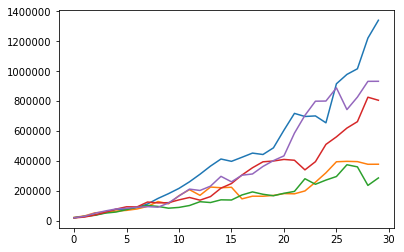

In [97]:
# 6. Plot first five simulated portfolios
plots.plot(sim[first_five])

In [98]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(sim.loc[29]))
print("Mean: ", (np.mean(sim.loc[29])))
print("SD: ",(np.std(sim.loc[29])))
print("Max: ",(np.max(sim.loc[29])))
print("Min: ", (np.min(sim.loc[29])))

Count: 5000
Mean:  1036842.3403819982
SD:  584227.4243318771
Max:  5684057.98
Min:  137283.98


In [99]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     1.036842e+06
std      5.842859e+05
min      1.372840e+05
25%      6.317694e+05
50%      8.931183e+05
75%      1.284012e+06
max      5.684058e+06
Name: 29, dtype: float64

(array([   2.,   15.,   59.,   96.,  150.,  194.,  249.,  235.,  273.,
         268.,  282.,  265.,  254.,  232.,  239.,  188.,  162.,  194.,
         152.,  144.,  133.,  103.,  114.,   99.,  101.,   77.,   73.,
          51.,   59.,   56.,   40.,   41.,   43.,   33.,   35.,   33.,
          26.,   13.,   27.,   13.,   20.,   13.,   16.,   19.,   12.,
           7.,    9.,    5.,    5.,   10.,    1.,    3.,    5.,    6.,
           2.,    3.,    5.,    4.,    1.,    2.,    3.,    1.,    4.,
           3.,    3.,    0.,    1.,    2.,    0.,    1.,    1.,    1.,
           0.,    1.,    0.,    0.,    0.,    1.,    2.,    0.,    1.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  137283.98,   192751.72,   248219.46,   303687.2 ,   359154.94,
          414622.68,   470090.42,   525558.16,   581025.9 ,   636493.64,
          691961.38,   747429.12,   802896.86,   858364.6 ,   91

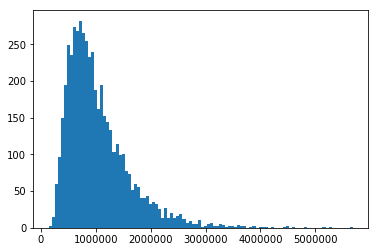

In [100]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)

In [101]:
# 10. Calculate probability of seeing an ending value less than 1000000.

len(ending_values[ending_values<1000000]) / len(ending_values)


0.5822